In [23]:
# Import pandas as a alias 'pd'
import pandas as pd


# Load the CSV file "USA_Housing.csv"
creditcard = pd.read_csv("./Desktop/Data Science/csv_file/creditcardcsvpresent.csv")

In [24]:
from sklearn.model_selection import train_test_split
X = creditcard[['Merchant_id', 'Transaction date', 'Average Amount/transaction/day', 'Transaction_amount', 
                'Is declined', 'Total Number of declines/day', 'isForeignTransaction', 'isHighRiskCountry', 
                'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt', '6-month_chbk_freq']]
y = creditcard[['isFradulent']]

# 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# data 정제
X.loc[X['Is declined'] == "N", "Is declined"] = 0
X.loc[X['Is declined'] == "Y", "Is declined"] = 1

X.loc[X['isForeignTransaction'] == "N", "isForeignTransaction"] = 0
X.loc[X['isForeignTransaction'] == "Y", "isForeignTransaction"] = 1

X.loc[X['isHighRiskCountry'] == "N", "isHighRiskCountry"] = 0
X.loc[X['isHighRiskCountry'] == "Y", "isHighRiskCountry"] = 1

C:\Users\Richsea\Anaconda3\envs\venv\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
y.loc[y['isFradulent'] == "N"] = 0
y.loc[y['isFradulent'] == "Y"] = 1

y = y.astype('int64')

C:\Users\Richsea\Anaconda3\envs\venv\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Richsea\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Richsea\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [28]:
X_preproc = X.drop(columns=['Transaction date'], axis=1)
X_preproc = X_preproc.drop(columns=['Merchant_id'], axis=1)
X_preproc = X_preproc.drop(columns=['Average Amount/transaction/day'], axis=1)
y_preproc = y

X_train, X_test, y_train, y_test = train_test_split(X_preproc, y_preproc, random_state=30)

In [29]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

naive = GaussianNB().fit(X_train, y_train)

C:\Users\Richsea\Anaconda3\envs\venv\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
y_train_hat = naive.predict(X_train)
y_test_hat = naive.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

isFradulent = ['not Fradulent', 'Fradulent']
print(classification_report(y_train, y_train_hat, target_names = isFradulent))

               precision    recall  f1-score   support

not Fradulent       0.97      0.97      0.97      1959
    Fradulent       0.81      0.81      0.81       347

     accuracy                           0.94      2306
    macro avg       0.89      0.89      0.89      2306
 weighted avg       0.94      0.94      0.94      2306



In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat, target_names = isFradulent))

               precision    recall  f1-score   support

not Fradulent       0.97      0.97      0.97       668
    Fradulent       0.82      0.80      0.81       101

     accuracy                           0.95       769
    macro avg       0.89      0.89      0.89       769
 weighted avg       0.95      0.95      0.95       769



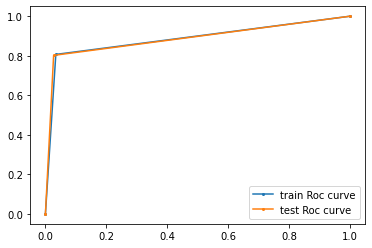

In [33]:
from sklearn.metrics import roc_curve
import matplotlib.pylab as plt

fpr1, tpr1, thresholds1 = roc_curve(y_train, y_train_hat)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_test_hat)

plt.plot(fpr1, tpr1, 'o-', ms=2, label="train Roc curve")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="test Roc curve")
plt.legend()

plt.show()

In [6]:
dfX = pd.DataFrame(X_test)
dfy = pd.DataFrame(y_test, columns=["isFradulent"])

df = pd.concat([dfX, dfy], axis=1)

df

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
718,3669591416,914.189119,10970.269430,0,0,1,0,0,0.0,0,0
2442,5898299321,389.000847,1945.004237,0,6,0,0,0,0.0,0,0
2484,5945688972,199.060051,5971.801539,0,0,0,0,0,0.0,0,0
1326,4426966493,55.588537,722.650979,0,0,0,0,0,0.0,0,0
1640,4869557815,757.711593,13638.808670,0,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1068,4116583683,924.772070,2774.316211,0,0,0,0,0,0.0,0,0
2419,5874276320,603.901674,603.901674,0,0,0,0,0,0.0,0,0
978,4000709141,634.608333,6346.083330,0,0,0,0,0,0.0,0,0
2293,5702044213,750.425397,14258.082530,0,6,0,0,0,0.0,0,0


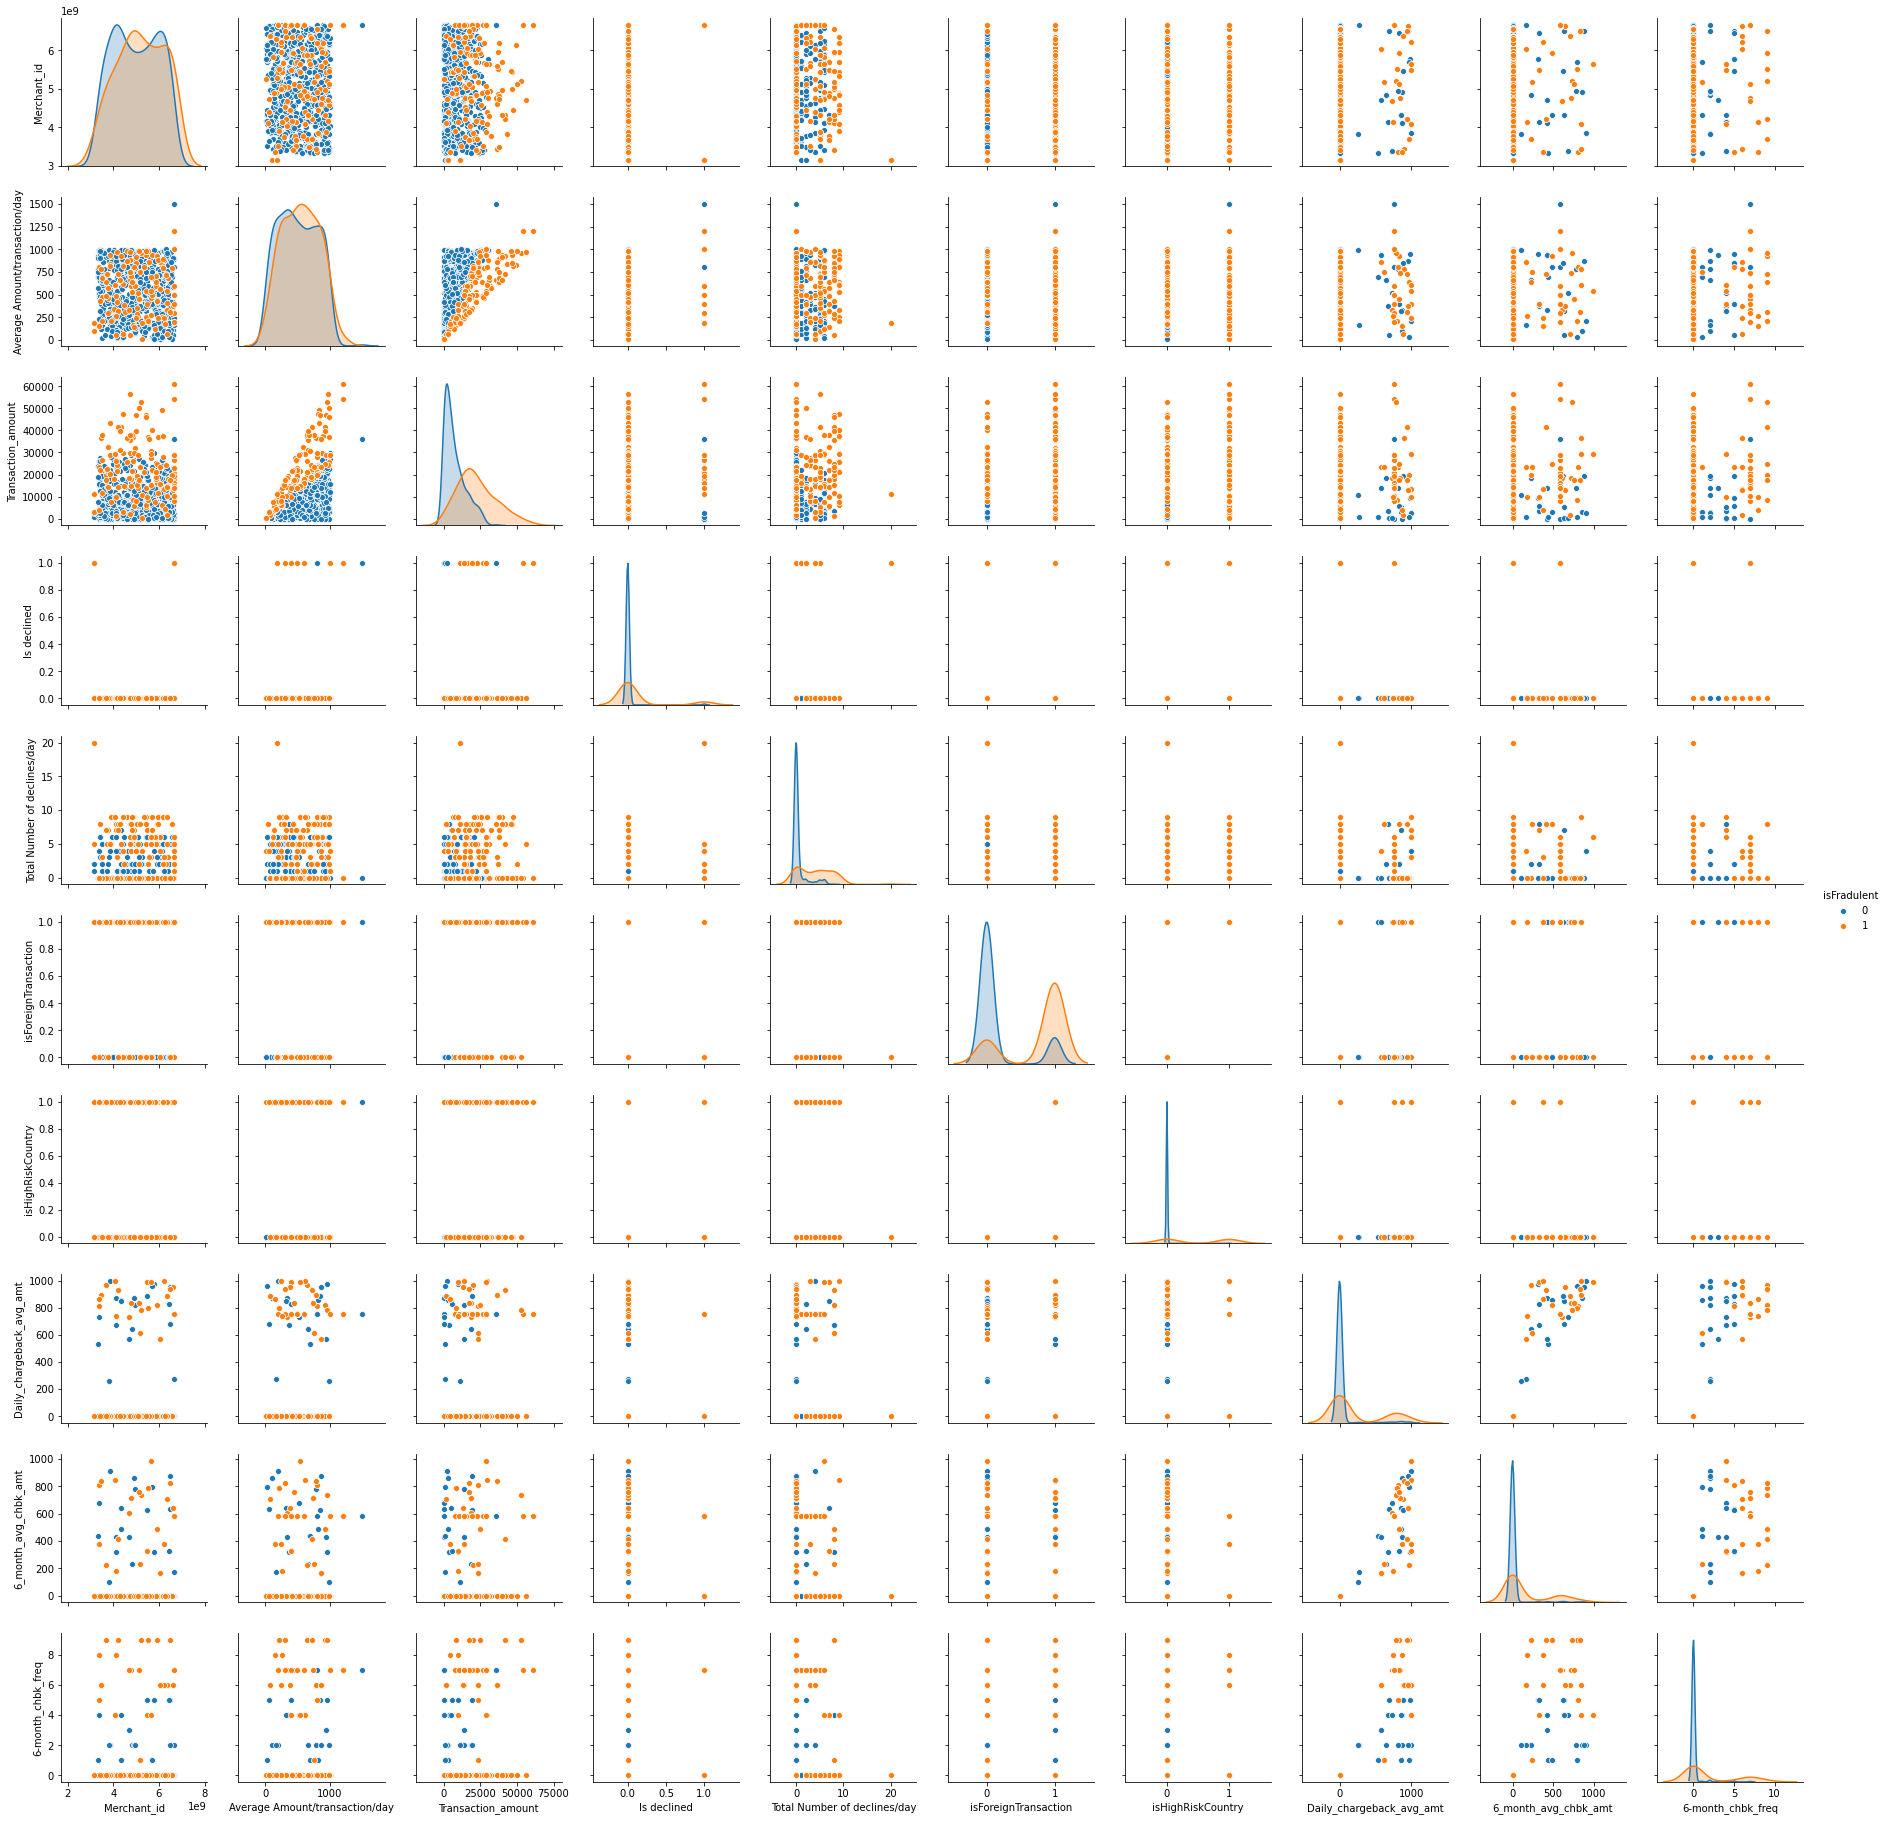

In [7]:
import seaborn as sns
import matplotlib.pylab as plt

sns.pairplot(df, hue="isFradulent")
plt.show()